In [1]:
#Note:  Work in progress.  Codes are experimental so they might be missing some test cases/logics.
#                


# Keras LSTM Time Series prediction

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

Using TensorFlow backend.


In [3]:
import keras
print (keras.__version__)
%matplotlib notebook
%matplotlib inline

2.0.2


In [ ]:
# Loading the data:
# Sept 16, 17 Note: - My last April 19th's downloaded dataset for USDCAD 
#                    from Yahoo Finance web site was successful.  Unfortunately,
#                    the site does not give historical data for currency anymore.
#                    One could use investing.com to get currency data.  But, we
#                    will use my April 19th spreadsheet for now.
                      

In [ ]:
def get_data():
    #To download and scape from a finance web site.  And save it to a usable
    #format to import later
    url='....investing.com'    
    return df

# Loading csv file

In [4]:
#CSV:  From Yahoo Finance's on April 19th, 2017
#df=pd.read_csv('USDCAD-20yrs from Apr 19-2017-Close.csv') 
df=pd.read_csv('USDCAD-20yrs from Apr 19-2017-All.csv') 
df.head()

,Open,High,Close
0,1.3382,1.3478,1.3382
1,1.3315,1.3399,1.3309
2,1.3321,1.3324,1.3260
3,1.3327,1.3337,1.3307
4,1.3253,1.3339,1.3220


In [ ]:
#The values are close in their ranges, so it should be ok to not normalize for our testing purposes

In [5]:
def load_data(original_df, seq_len):
    #Source:  some section taken from https://github.com/jaungiers/LSTM-Neural-Network-for-Time-Series-Prediction/blob/master/lstm.py
    #return: splitted train/test data 
    amount_of_features = len(original_df.columns)
    data = original_df.as_matrix()
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
        
    result = np.array(result)
    
    #split the train/test with 90% train, and the rest test
    #target is the last column
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]




##  Build the model

In [6]:
#Basic LSTM model:
def build_model(layers):
    drop_out_rate = 0.2
    model = Sequential()
    model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(drop_out_rate))
    model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(drop_out_rate))
    model.add(Dense(16,activation='relu'))        
    model.add(Dense(1,activation='linear'))
    model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
    return model
    


## Train 

In [7]:
#Try diffent window size:  20, 50, 100, 200
#Worked well:window = 22
window=22
X_train, y_train, X_test, y_test = load_data(df[::-1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (4460, 22, 3)
y_train (4460,)
X_test (496, 22, 3)
y_test (496,)


In [8]:
model = build_model([3,window,1])


In [9]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=50,
    validation_split=0.1,
    verbose=1)

Train on 4014 samples, validate on 446 samples
Epoch 1/50
4014/4014 [==============================] - 5s - loss: 0.5171 - acc: 0.0000e+00 - val_loss: 0.1814 - val_acc: 0.0000e+00
Epoch 2/50
4014/4014 [==============================] - 3s - loss: 0.0839 - acc: 4.9826e-04 - val_loss: 0.0229 - val_acc: 0.0000e+00
Epoch 3/50
4014/4014 [==============================] - 3s - loss: 0.0442 - acc: 4.9826e-04 - val_loss: 0.0174 - val_acc: 0.0000e+00
Epoch 4/50
4014/4014 [==============================] - 3s - loss: 0.0305 - acc: 4.9826e-04 - val_loss: 0.0020 - val_acc: 0.0000e+00
Epoch 5/50
4014/4014 [==============================] - 3s - loss: 0.0256 - acc: 4.9826e-04 - val_loss: 0.0087 - val_acc: 0.0000e+00
Epoch 6/50
4014/4014 [==============================] - 3s - loss: 0.0216 - acc: 4.9826e-04 - val_loss: 5.0281e-04 - val_acc: 0.0000e+00
Epoch 7/50
4014/4014 [==============================] - 3s - loss: 0.0178 - acc: 4.9826e-04 - val_loss: 0.0021 - val_acc: 0.0000e+00
Epoch 8/50
4014/40

##  Plot out Prediction vs Test Results

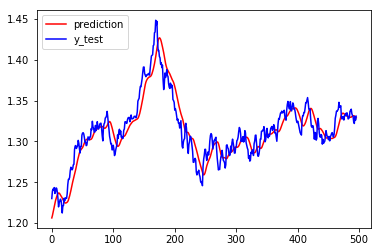

In [11]:
import matplotlib.pyplot as plt2

p = model.predict(X_test)  #Thai's

plt2.plot(p,color='red', label='prediction')
plt2.plot(y_test,color='blue', label='y_test')
plt2.legend(loc='upper left')
plt2.show()

In [ ]:
#Result:  
# The plot looks good, seems to work.  Will still need to run for different
# parameters, normalization ect to observe.  Also, from the blog's comments, other
# users have experienced inconsistent results.  Will need to examine further....

#When ran on T2.Small on AWS - 6 sec per epoch
#The predicted curve moves closer to true value as # epochs increase.

#When ran locally with 50 epochs - First epoch 6 sec, then subsequent 3-4 sec.  
#The predicted curve very close to true value.